In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats 

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score 

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 

from sklearn.preprocessing import FunctionTransformer 
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_30368\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [8]:
x

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
x_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


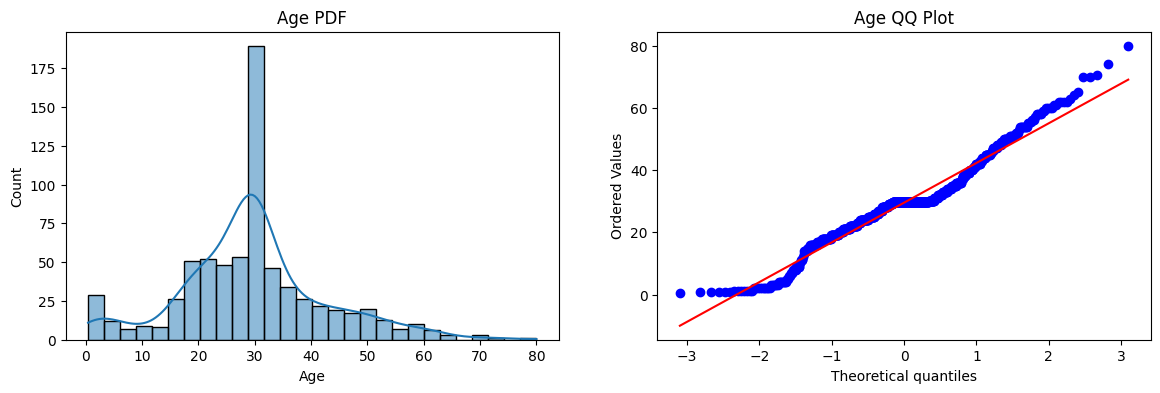

In [11]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(x_train['Age'], kde=True)
plt.title ('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')

plt.show()

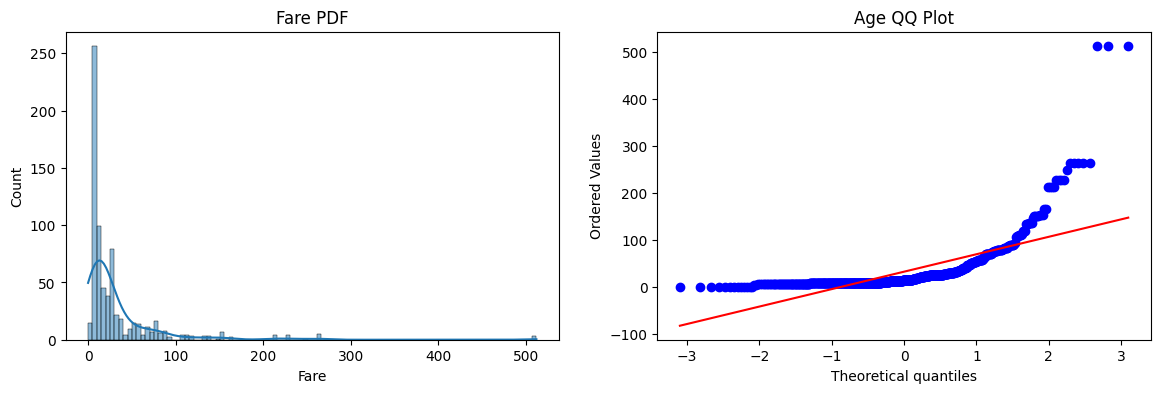

In [12]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(x_train['Fare'], kde=True)
plt.title ('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [13]:
clf =LogisticRegression()
clf2=DecisionTreeClassifier()



In [14]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred=clf.predict(x_test)
y_pred1=clf2.predict(x_test)

In [15]:
print(" accuracy lr",accuracy_score(y_test,y_pred))
print(" accuracy dt",accuracy_score(y_test,y_pred1))

 accuracy lr 0.6480446927374302
 accuracy dt 0.6703910614525139


In [16]:
trf =FunctionTransformer(func=np.log1p)

In [17]:
x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.fit_transform(x_test)

In [18]:
clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred=clf.predict(x_test_transformed)
y_pred1=clf2.predict(x_test_transformed)

In [19]:
print(" accuracy lr",accuracy_score(y_test,y_pred))
print(" accuracy dt",accuracy_score(y_test,y_pred1))

 accuracy lr 0.6815642458100558
 accuracy dt 0.6871508379888268


In [23]:
x_transformed=trf.fit_transform(x)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print('LR',np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
LR 0.6599750312109862


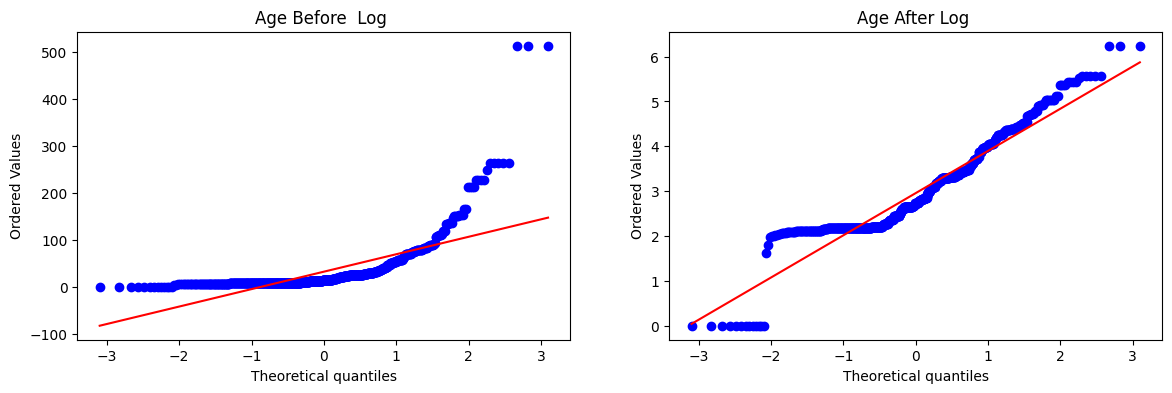

In [26]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare Before  Log ')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('Fare After Log ')

plt.show()

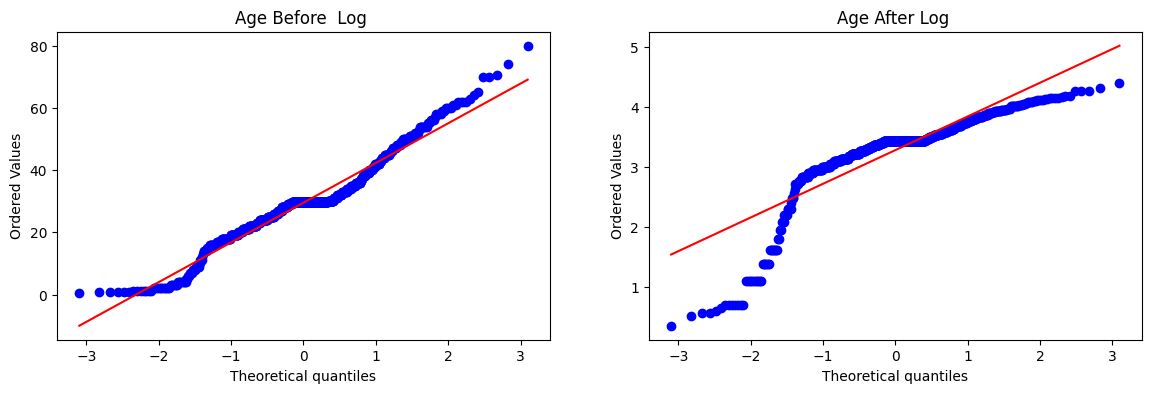

In [27]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age Before  Log ')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist='norm',plot=plt)
plt.title('Age After Log ')

plt.show()

In [30]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2=trf2.fit_transform(x_train)

y_train_transformed2=trf2.fit_transform(y_train)

IndexError: tuple index out of range